# Problem 5: Inverse Ising model

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from networks_sup import *
np.set_printoptions(precision=3, suppress=True)

def heat(array):
    ax = plt.gca()
    ax.tick_params('x', labeltop=True, labelright=True, top=True, right=True)
    plt.imshow(array, cmap='bwr', interpolation='nearest', vmin=-0.2, vmax=0.2)
    plt.colorbar()
    plt.xticks(np.arange(len(array)))
    plt.show()

# size of graph
N = 8 # has to be >= 5

corr = np.zeros((N, N))
real = np.zeros((N, N))

num = 21
pi = 0.4
T = 10

points = 2000
mini_steps = 2*N
print("# of iterations:", points)

graph = generate(N, pi)

# create a "actual" correlation matrix
for i in range(N):
    for j in range(N):
        if j in graph.graph_dict[i]:
            real[i,j] = 0.2

graph.start_spins()
spins = []

for step in range(points):
    for mini_step in range(mini_steps):
        flip(graph, T)
    spins.append(graph.spins[:])

spins = np.asarray(spins)

# calculate the correlation matrix
for i in range(N):
    for j in range(N):
        corr[i,j] = np.mean(spins[:,i] * spins[:,j]) - np.mean(spins[:,i]) * np.mean(spins[:,j])

inved = np.linalg.inv(corr)

inved2 = np.copy(inved)
np.fill_diagonal(inved2, 0)
        
corr2 = np.copy(corr)
np.fill_diagonal(corr2, 0)

# of iterations: 2000



Connected correlations


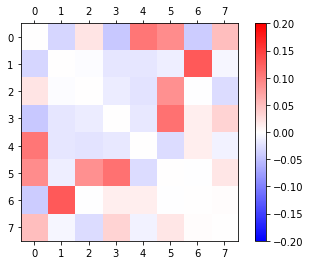

Mean field approach


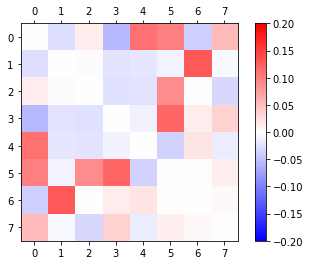

Real connections


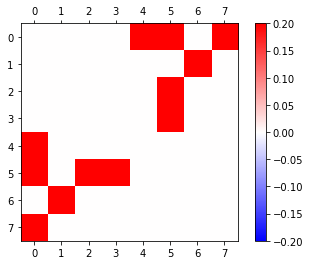

In [23]:
print()
print("Connected correlations")
heat(corr2)

print("Mean field approach")
heat(-inved2)

print("Real connections")
heat(real)

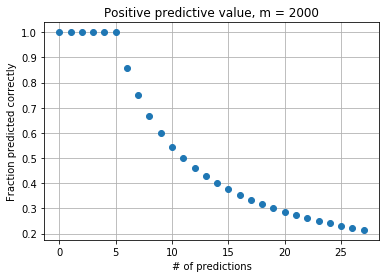

In [27]:
# this is for finding the most correlated pairs in a simple way using Pandas
df = pd.DataFrame(spins)

# finds the correlation matrix again
correl = df.corr().abs()
# "unrolls" for easier comparison
s = correl.unstack()
so = s.sort_values(kind="quicksort", ascending=False)

best = []

for pair in np.arange(N, len(so), 2):
    try:
        best.append(so.keys()[pair])
    except IndexError:
        pass

correct = np.zeros(N*(N-1)//2)
corre = 0

for pair in range(len(best)):
    if real[best[pair]] > 0.1:
        corre += 1
    correct[pair] = corre / (pair+1)


plt.figure()
plt.title("Positive predictive value, m = " + str(points))
plt.ylabel("Fraction predicted correctly")
plt.xlabel("# of predictions")
plt.grid()
plt.plot(correct, 'o')
plt.show()



In [ ]:
con_corr = []
con_inv = []
ucon_corr = []
ucon_inv = []

for i in range(N):
    for j in range(N):
        if j in graph.graph_dict[i]:
            con_corr.append(corr[i,j])
            con_inv.append(-inved[i,j])
        else:
            ucon_corr.append(corr[i,j])
            ucon_inv.append(-inved[i,j])

plt.figure()
data = np.vstack([con_corr, con_inv]).T
plt.title("Estimated connected correlations")
plt.hist(data, label=["Correlations", "Mean field"])
plt.legend()
plt.show()

plt.figure()
data = np.vstack([ucon_corr, ucon_inv]).T
plt.title("Estimated not-connected correlations")
plt.hist(data, label=["Correlations", "Mean field"])
plt.legend()
plt.show()

bins=21
plt.figure()
plt.rcParams["patch.force_edgecolor"] = True
plt.hist(con_corr, color='r', bins=bins, alpha=0.5, label="Correlations")
plt.hist(con_inv, color='b', bins=bins, alpha=0.5, label="Mean field")
plt.legend()
plt.show()

bins = 21
lim = 0.1
plt.figure()
plt.rcParams["patch.force_edgecolor"] = True
plt.hist(ucon_corr, color='r', bins=bins, alpha=0.5, range=[-lim,lim], label="Correlations")
plt.hist(ucon_inv, color='b', bins=bins, alpha=0.5, range=[-lim,lim], label="Mean field")
plt.legend()
plt.show()


plt.close("all")